In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import seaborn as sns
import wandb
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata



In [2]:
wandb.login(key="8a88a8c49d1c2d31b8677fe0b8eb7d3e3a031f83")
api = wandb.Api()
sweep_id = "belaschindler-university-hamburg/0schindl-LayUp_sweeps_question1_results/qo7chtw9"
sweep = api.sweep(sweep_id)
runs = sweep.runs

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /export/home/0schindl/.netrc
wandb: Currently logged in as: belaschindler (belaschindler-university-hamburg) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [3]:
data = []
for run in runs:
    config = run.config
    summary = run.summary
    
    num_tasks = config.get("T")
    num_experts = config.get("moe_max_experts")
    acc = summary.get("task_mean/acc")
    run_id = run.id
    state = run.state
    if state == "finished" and acc != None:
        data.append({
            "run_id": run_id,
            "num_tasks": num_tasks,
            "num_experts": num_experts,
            "acc": acc,
            "state": state
        })

df = pd.DataFrame(data)

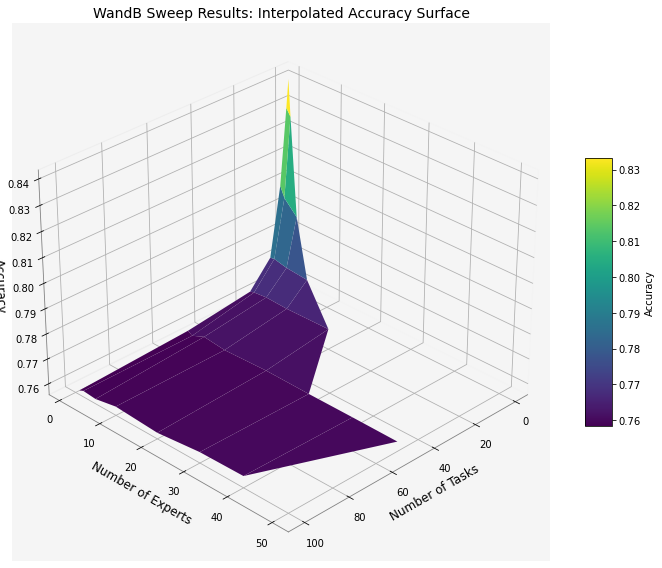

In [4]:
# Extract unique values for num_tasks and num_experts to create the grid
num_tasks_unique = np.unique(df["num_tasks"])
num_experts_unique = np.unique(df["num_experts"])

# Create a meshgrid from the unique values
X, Y = np.meshgrid(num_tasks_unique, num_experts_unique)

# Extract the accuracy values and corresponding coordinates
points = df[["num_tasks", "num_experts"]].values
values = df["acc"].values

# Define the fill value for the empty regions
fill_value = np.nan  # You can change this to 0 or another suitable value

# Interpolate the accuracy values onto the grid
Z = griddata(points, values, (X, Y), method='linear', fill_value=fill_value)

# Create the figure and 3D subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Plot the surface with the interpolated data
surface = ax.plot_surface(X, Y, Z, cmap=sns.color_palette("viridis", as_cmap=True),
                          linewidth=0.2, antialiased=True, shade=True)

# Add a color bar for better interpretation
fig.colorbar(surface, shrink=0.5, aspect=10, label='Accuracy')

# Customize the axes labels and title for clarity
ax.set_xlabel('Number of Tasks', fontsize=12)
ax.set_ylabel('Number of Experts', fontsize=12)
ax.set_zlabel('Accuracy', fontsize=12)
ax.set_title('WandB Sweep Results: Interpolated Accuracy Surface', fontsize=14)

# Improve the viewing angle
ax.view_init(elev=30, azim=45)

# Add a subtle grid for orientation
ax.grid(True, linestyle='--', alpha=0.5)

# Make the background a bit lighter
ax.set_facecolor('whitesmoke')

# Tweak the appearance of the axes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.line.set_color('gray')
ax.yaxis.line.set_color('gray')
ax.zaxis.line.set_color('gray')

# Ensure tight layout
plt.tight_layout()

# Save the figure with a high DPI
plt.savefig('wandb_sweep_surface_interpolated.png', dpi=400, bbox_inches='tight')
plt.show()


## Different Methods

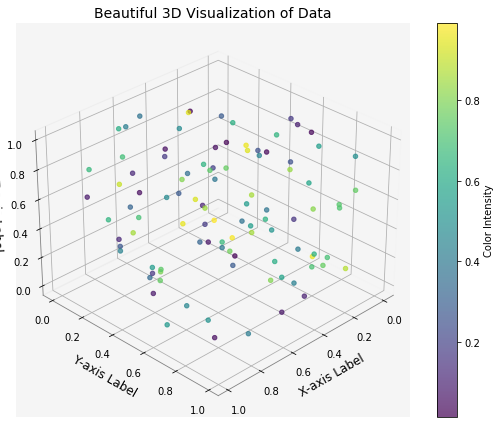

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns  # For nicer color palettes

# Assume your 3D data is stored in these variables
# Replace these with your actual data
np.random.seed(42) # for reproducibility
x_data = np.random.rand(100)
y_data = np.random.rand(100)
z_data = np.random.rand(100)
color_data = np.random.rand(100) # Optional: for color mapping

# Choose a visually appealing color palette from seaborn
palette = sns.color_palette("viridis", as_cmap=True)

# Create a figure and a 3D subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

# Scatter plot with improved aesthetics
scatter = ax.scatter(x_data, y_data, z_data, c=color_data, cmap=palette, marker='o', s=20, alpha=0.7)
fig.colorbar(scatter, label='Color Intensity') # Add a colorbar if using color mapping

# Set labels for the axes with a slightly larger font size
ax.set_xlabel('X-axis Label', fontsize=12)
ax.set_ylabel('Y-axis Label', fontsize=12)
ax.set_zlabel('Z-axis Label', fontsize=12)

# Add a title with a larger font size
ax.set_title('Beautiful 3D Visualization of Data', fontsize=14)

# Improve the viewing angle
ax.view_init(elev=30, azim=45)

# Add a subtle grid
ax.grid(True, linestyle='--', alpha=0.6)

# Make the background a bit lighter
ax.set_facecolor('whitesmoke')

# Tweak the appearance of the axes
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.line.set_color('gray')
ax.yaxis.line.set_color('gray')
ax.zaxis.line.set_color('gray')

# Ensure tight layout
plt.tight_layout()

# Save the figure with high DPI
plt.savefig('beautiful_3d_scatter_plot.png', dpi=400, bbox_inches='tight')
plt.show()

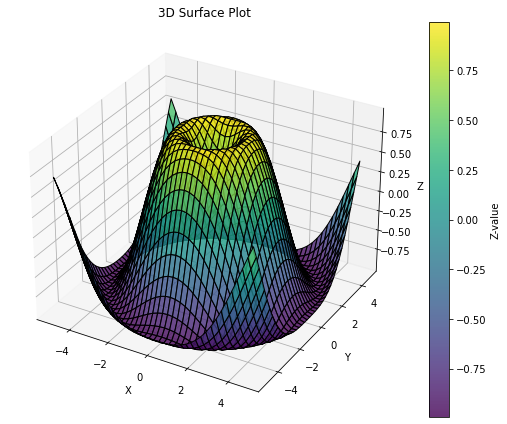

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample gridded data (replace with your data)
num1 = np.arange(-5, 5, 0.25)
num2 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(num1, num2)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)
fig.colorbar(surface, label='Z-value')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')
plt.tight_layout()
plt.savefig('3d_surface_plot.png', dpi=300)
plt.show()

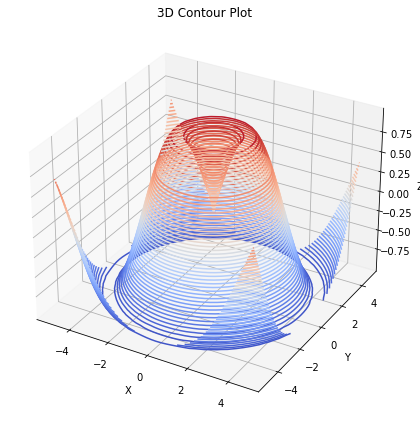

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample gridded data (replace with your data)
num1 = np.arange(-5, 5, 0.25)
num2 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(num1, num2)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
contour = ax.contour3D(X, Y, Z, 50, cmap='coolwarm') # 50 is the number of contour levels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Contour Plot')
plt.tight_layout()
plt.savefig('3d_contour_plot.png', dpi=300)
plt.show()

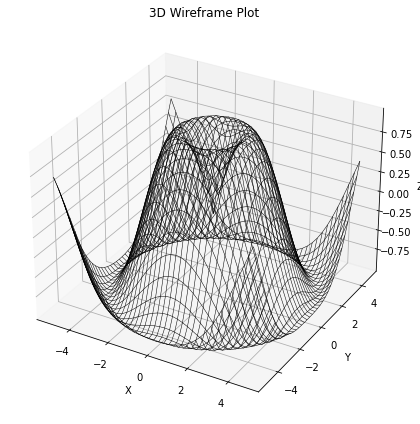

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample gridded data (replace with your data)
num1 = np.arange(-5, 5, 0.25)
num2 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(num1, num2)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
wireframe = ax.plot_wireframe(X, Y, Z, color='black', linewidth=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Wireframe Plot')
plt.tight_layout()
plt.savefig('3d_wireframe_plot.png', dpi=300)
plt.show()

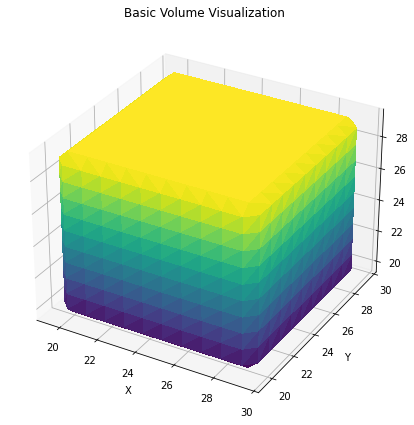

In [5]:
# Example using scikit-image (requires volumetric data)
# This is a simplified example and might need adaptation based on your data format
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D

# Sample volumetric data (replace with your data)
data = np.zeros((50, 50, 50))
data[20:30, 20:30, 20:30] = 1

verts, faces, normals, values = measure.marching_cubes(data, level=0.5)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
mesh = ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2],
                       cmap='viridis', linewidth=0.5, antialiased=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Basic Volume Visualization')
plt.tight_layout()
plt.savefig('basic_volume_plot.png', dpi=300)
plt.show()

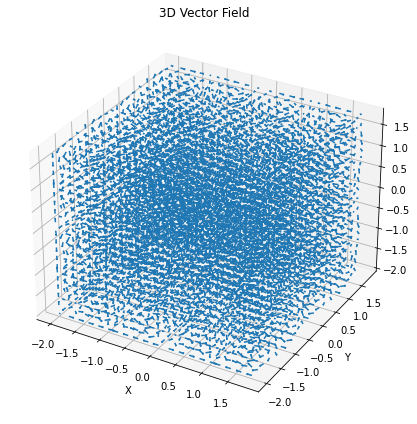

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Sample vector field data (replace with your data)
x, y, z = np.meshgrid(np.arange(-2, 2, .2),
                      np.arange(-2, 2, .2),
                      np.arange(-2, 2, .2))
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0/3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector Field')
plt.tight_layout()
plt.savefig('3d_vector_field.png', dpi=300)
plt.show()